# Capstone: Predicting Car Collision Outcomes Based on Situational Classification Data

## PART II of II

### DATA VISUALIZATION, COLLISION PREDICTION MODEL, ACCURACY RESULTS

Now that the input data from OpenOttawa is cleaned and saved, the following steps will be taken to create a model that can predict if a collision will result in only property damage or injury, including fatalitites, based on the input classification data.

Steps:
1. Read updated data
2. Reduce DataFrame to only have the following columns:
- Classification_Of_Accident
- Environment_Condition
- Light
- Road_Surface_Condition
- Traffic Condition
3. Visualize each column category in bar charts
4. Balance data to have equal rows of property damage and injury outcomes.
5. Change categorized data into OHE dummy data
6. Use LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier using the ensemble method to predict the type of collision outcome based on the conditions listed above.
7. Compare ensemble accuracy with just LogReg model accuracy and boosting accuracy.

#### Model Summary
The confusion matrices and accuracy results below do not show that using logistic regression or ensemble methods predict if a more serious collision will occur, but rather how well does logistic regression predict the outcome of either property damage or injury. 

A smaller, more specifically scoped project, such as reviewing infracture changes to an intersection or road before and after implementation for example, with daily traffic count and collision data would be an application where a classification model can be used to determine if the infrastures contributed to the decrease (or increase) the chances in a collision occuring.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file form 
collision = pd.read_csv('./data/2019_Ottawa_Collision_Data.csv')

In [3]:
collision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16372 entries, 0 to 16371
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  16372 non-null  int64  
 1   Anom_ID                     16372 non-null  object 
 2   Accident_Date               16372 non-null  object 
 3   Accident_Time               16372 non-null  object 
 4   Location                    16372 non-null  object 
 5   Geo_ID                      16372 non-null  object 
 6   Accident_Location           16372 non-null  object 
 7   Classification_Of_Accident  16372 non-null  object 
 8   Initial_Impact_Type         16372 non-null  object 
 9   Environment_Condition       16372 non-null  object 
 10  Light                       16372 non-null  object 
 11  Road_Surface_Condition      16372 non-null  object 
 12  Traffic_Control             16372 non-null  object 
 13  Traffic_Control_Condition   163

In [4]:
# reduce columns

In [5]:
collision = collision.drop(columns=['Unnamed: 0','Anom_ID', 'Accident_Date', 'Accident_Time', 'Location', 'Geo_ID', 'Accident_Location','Initial_Impact_Type','Traffic_Control_Condition','X','Y','LATITUDE','LONGITUDE','ObjectId','road_cond_num'])
collision.head(2)

Classification_Of_Accident Environment_Condition      Light  \
0             03 - P.D. only             03 - Snow  07 - Dark   
1             03 - P.D. only            01 - Clear  03 - Dawn   

  Road_Surface_Condition      Traffic_Control  
0             04 - Slush      10 - No control  
1               01 - Dry  01 - Traffic signal

## Accident Classification

In [6]:
collision.Classification_Of_Accident.value_counts()

03 - P.D. only           13657
02 - Non-fatal injury     2691
01 - Fatal injury           24
Name: Classification_Of_Accident, dtype: int64

In [7]:
collision_class = collision['Classification_Of_Accident'].value_counts().reset_index()
collision_class.columns = ['Classification', 'count']
collision_class

Classification  count
0         03 - P.D. only  13657
1  02 - Non-fatal injury   2691
2      01 - Fatal injury     24

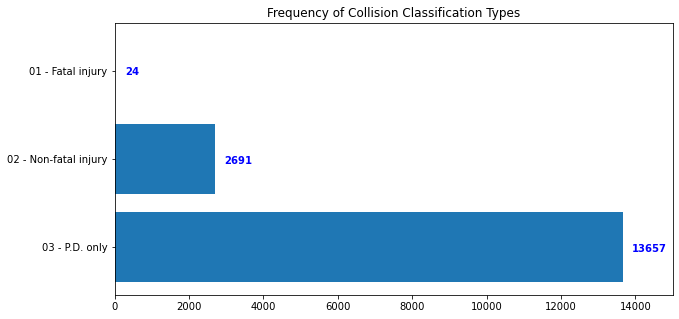

In [8]:
# Create a bar chart of collision types value count
plt.figure(figsize=(10,5))
plt.barh(y=collision_class.Classification, width=collision_class['count'])
plt.xlim(0,15_000)
plt.title('Frequency of Collision Classification Types')
for i, v in enumerate(collision_class['count']):
    plt.text(v + 250, i - 0.05, str(v), color='blue', fontweight='bold');

In [9]:
# change classification to injured, non-injured

In [10]:
collision['Classification_Of_Accident'] = collision['Classification_Of_Accident'].replace('01 - Fatal injury','02 - Injury')
collision['Classification_Of_Accident'] = collision['Classification_Of_Accident'].replace('02 - Non-fatal injury','02 - Injury')
collision['Classification_Of_Accident'] = collision['Classification_Of_Accident'].replace('03 - P.D. only','01 - Property Damage')

collision.Classification_Of_Accident.value_counts()

01 - Property Damage    13657
02 - Injury              2715
Name: Classification_Of_Accident, dtype: int64

## Environment Conditions

In [11]:
collision.Environment_Condition.value_counts()

01 - Clear                     12789
03 - Snow                       1652
02 - Rain                       1492
04 - Freezing Rain               283
05 - Drifting Snow                89
00 - Unknown                      26
07 - Fog, mist, smoke, dust       21
06 - Strong wind                  20
Name: Environment_Condition, dtype: int64

In [12]:
collision_enviro = collision['Environment_Condition'].value_counts().reset_index()
collision_enviro.columns = ['Environment_Condition', 'count']
collision_enviro

Environment_Condition  count
0                   01 - Clear  12789
1                    03 - Snow   1652
2                    02 - Rain   1492
3           04 - Freezing Rain    283
4           05 - Drifting Snow     89
5                 00 - Unknown     26
6  07 - Fog, mist, smoke, dust     21
7             06 - Strong wind     20

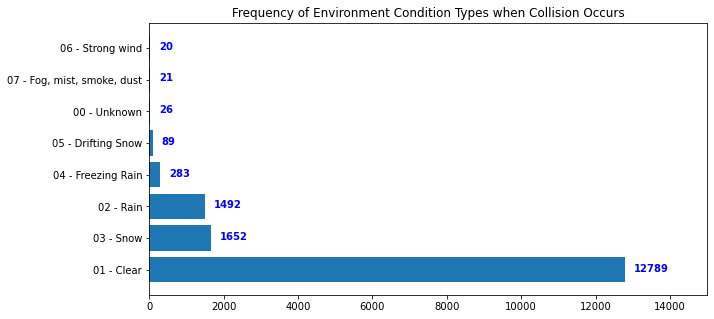

In [13]:
# Create a bar chart of collision types value count
plt.figure(figsize=(10,5))
plt.barh(y=collision_enviro.Environment_Condition, width=collision_enviro['count'])
plt.xlim(0,15_000)
plt.title('Frequency of Environment Condition Types when Collision Occurs')
for i, v in enumerate(collision_enviro['count']):
    plt.text(v + 250, i - 0.05, str(v), color='blue', fontweight='bold');

In [14]:
# change classification to clear  and not clear, assume unknown is clear

In [15]:
#collision['Environment_Condition'] = collision['Environment_Condition'].replace('02 - Rain','02 - Not Clear')
#collision['Environment_Condition'] = collision['Environment_Condition'].replace('03 - Snow','02 - Not Clear')
#collision['Environment_Condition'] = collision['Environment_Condition'].replace('04 - Freezing Rain','02 - Not Clear')
#collision['Environment_Condition'] = collision['Environment_Condition'].replace('05 - Drifting Snow','02 - Not Clear')
#collision['Environment_Condition'] = collision['Environment_Condition'].replace('06 - Strong wind','02 - Not Clear')
#collision['Environment_Condition'] = collision['Environment_Condition'].replace('07 - Fog, mist, smoke, dust','02 - Not Clear')
#collision['Environment_Condition'] = collision['Environment_Condition'].replace('00 - Unknown','01 - Clear')

collision.Environment_Condition.value_counts()

01 - Clear                     12789
03 - Snow                       1652
02 - Rain                       1492
04 - Freezing Rain               283
05 - Drifting Snow                89
00 - Unknown                      26
07 - Fog, mist, smoke, dust       21
06 - Strong wind                  20
Name: Environment_Condition, dtype: int64

## Light Conditions

In [16]:
collision.Light.value_counts()

01 - Daylight    10862
07 - Dark         3628
05 - Dusk          801
00 - Unknown       654
03 - Dawn          427
Name: Light, dtype: int64

In [17]:
collision_light = collision['Light'].value_counts().reset_index()
collision_light.columns = ['Light', 'count']
collision_light

Light  count
0  01 - Daylight  10862
1      07 - Dark   3628
2      05 - Dusk    801
3   00 - Unknown    654
4      03 - Dawn    427

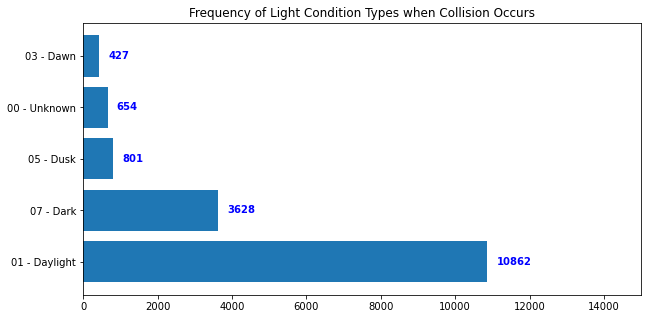

In [18]:
# Create a bar chart of collision types value count
plt.figure(figsize=(10,5))
plt.barh(y=collision_light.Light, width=collision_light['count'])
plt.xlim(0,15_000)
plt.title('Frequency of Light Condition Types when Collision Occurs')
for i, v in enumerate(collision_light['count']):
    plt.text(v + 250, i - 0.05, str(v), color='blue', fontweight='bold');

In [19]:
# change classification to numerical , assume unknown, dawn and dusk are also daylight

In [20]:
collision['Light'] = collision['Light'].replace('03 - Dawn','02 - Dawn')
collision['Light'] = collision['Light'].replace('05 - Dusk','03 - Dusk')
collision['Light'] = collision['Light'].replace('00 - Unknown','01 - Daylight')
collision['Light'] = collision['Light'].replace('07 - Dark','04 - Dark')
collision.Light.value_counts()

01 - Daylight    11516
04 - Dark         3628
03 - Dusk          801
02 - Dawn          427
Name: Light, dtype: int64

## Road Surface Conditions

In [21]:
collision.Road_Surface_Condition.value_counts()

01 - Dry            10711
02 - Wet             2788
03 - Loose snow       997
06 - Ice              719
05 - Packed snow      580
04 - Slush            577
Name: Road_Surface_Condition, dtype: int64

In [22]:
collision_road = collision['Road_Surface_Condition'].value_counts().reset_index()
collision_road.columns = ['Road_Condition', 'count']
collision_road

Road_Condition  count
0          01 - Dry  10711
1          02 - Wet   2788
2   03 - Loose snow    997
3          06 - Ice    719
4  05 - Packed snow    580
5        04 - Slush    577

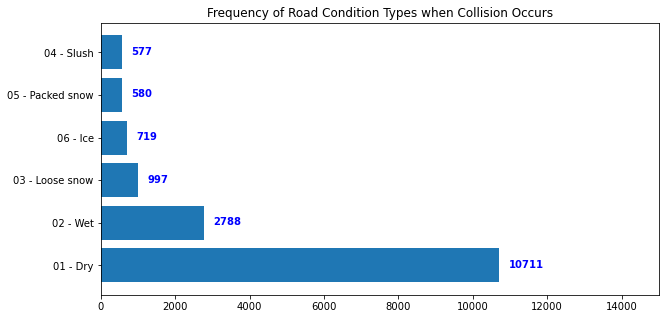

In [23]:
# Create a bar chart of collision types value count
plt.figure(figsize=(10,5))
plt.barh(y=collision_road.Road_Condition, width=collision_road['count'])
plt.xlim(0,15_000)
plt.title('Frequency of Road Condition Types when Collision Occurs')
for i, v in enumerate(collision_road['count']):
    plt.text(v + 250, i - 0.05, str(v), color='blue', fontweight='bold');

Keep different road conditions

In [24]:
# change classification to dry and not dry

In [25]:
#collision['Road_Surface_Condition'] = collision['Road_Surface_Condition'].replace('02 - Wet','02 - Not Dry')
#collision['Road_Surface_Condition'] = collision['Road_Surface_Condition'].replace('03 - Loose snow','02 - Not Dry')
#collision['Road_Surface_Condition'] = collision['Road_Surface_Condition'].replace('04 - Slush','02 - Not Dry')
#collision['Road_Surface_Condition'] = collision['Road_Surface_Condition'].replace('05 - Packed snow','02 - Not Dry')
#collision['Road_Surface_Condition'] = collision['Road_Surface_Condition'].replace('06 - Ice','02 - Not Dry')

collision.Road_Surface_Condition.value_counts()

01 - Dry            10711
02 - Wet             2788
03 - Loose snow       997
06 - Ice              719
05 - Packed snow      580
04 - Slush            577
Name: Road_Surface_Condition, dtype: int64

## Traffic Conditions

In [26]:
collision.Traffic_Control.value_counts()

10 - No control            7645
01 - Traffic signal        6520
02 - Stop sign             1868
11 - Roundabout             188
03 - Yield sign              79
12 - IPS                     35
99 - Other                   17
13 - MPS                      9
04 - Ped. crossover           6
09 - Traffic controller       2
08 - Traffic gate             2
07 - School bus               1
Name: Traffic_Control, dtype: int64

In [27]:
collision_sign = collision['Traffic_Control'].value_counts().reset_index()
collision_sign.columns = ['Traffic_Control', 'count']
collision_sign

Traffic_Control  count
0           10 - No control   7645
1       01 - Traffic signal   6520
2            02 - Stop sign   1868
3           11 - Roundabout    188
4           03 - Yield sign     79
5                  12 - IPS     35
6                99 - Other     17
7                  13 - MPS      9
8       04 - Ped. crossover      6
9   09 - Traffic controller      2
10        08 - Traffic gate      2
11          07 - School bus      1

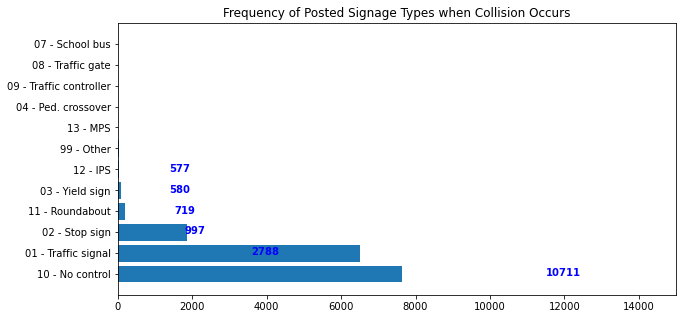

In [28]:
# Create a bar chart of collision types value count
plt.figure(figsize=(10,5))
plt.barh(y=collision_sign.Traffic_Control, width=collision_sign['count'])
plt.xlim(0,15_000)
plt.title('Frequency of Posted Signage Types when Collision Occurs')
for i, v in enumerate(collision_road['count']):
    plt.text(v + 800, i - 0.1, str(v), color='blue', fontweight='bold');

In [29]:
# re-order traffic control types

In [30]:
collision['Traffic_Control'] = collision['Traffic_Control'].replace('07 - School bus','06 - Other')
collision['Traffic_Control'] = collision['Traffic_Control'].replace('08 - Traffic gate','06 - Other')
collision['Traffic_Control'] = collision['Traffic_Control'].replace('09 - Traffic controller','06 - Other')
collision['Traffic_Control'] = collision['Traffic_Control'].replace('04 - Ped. crossover','06 - Other')
collision['Traffic_Control'] = collision['Traffic_Control'].replace('13 - MPS','06 - Other')
collision['Traffic_Control'] = collision['Traffic_Control'].replace('99 - Other','06 - Other')
collision['Traffic_Control'] = collision['Traffic_Control'].replace('12 - IPS','06 - Other')
collision['Traffic_Control'] = collision['Traffic_Control'].replace('03 - Yield sign','05 - Yield sign')
collision['Traffic_Control'] = collision['Traffic_Control'].replace('11 - Roundabout','04 - Roundabout')
collision['Traffic_Control'] = collision['Traffic_Control'].replace('02 - Stop sign','03 - Stop sign')
collision['Traffic_Control'] = collision['Traffic_Control'].replace('01 - Traffic signal','02 - Traffic signal')
collision['Traffic_Control'] = collision['Traffic_Control'].replace('10 - No control','01 - No control')

collision.Traffic_Control.value_counts()

01 - No control        7645
02 - Traffic signal    6520
03 - Stop sign         1868
04 - Roundabout         188
05 - Yield sign          79
06 - Other               72
Name: Traffic_Control, dtype: int64

In [31]:
collision.head()

Classification_Of_Accident Environment_Condition          Light  \
0       01 - Property Damage             03 - Snow      04 - Dark   
1       01 - Property Damage            01 - Clear      02 - Dawn   
2       01 - Property Damage            01 - Clear  01 - Daylight   
3       01 - Property Damage    04 - Freezing Rain      04 - Dark   
4       01 - Property Damage            01 - Clear      04 - Dark   

  Road_Surface_Condition      Traffic_Control  
0             04 - Slush      01 - No control  
1               01 - Dry  02 - Traffic signal  
2               01 - Dry  02 - Traffic signal  
3             04 - Slush      01 - No control  
4       05 - Packed snow      01 - No control

## Set up X and y

In [32]:
X = collision.drop(columns='Classification_Of_Accident')
y = collision['Classification_Of_Accident']

In [33]:
#pip install imbalanced-learn

In [34]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [35]:
X_resampled

Environment_Condition          Light Road_Surface_Condition  \
0                 03 - Snow      04 - Dark             04 - Slush   
1                01 - Clear      02 - Dawn               01 - Dry   
2                01 - Clear  01 - Daylight               01 - Dry   
3        04 - Freezing Rain      04 - Dark             04 - Slush   
4                01 - Clear      04 - Dark       05 - Packed snow   
...                     ...            ...                    ...   
27309            01 - Clear  01 - Daylight               02 - Wet   
27310             02 - Rain      02 - Dawn               02 - Wet   
27311            01 - Clear  01 - Daylight               01 - Dry   
27312            01 - Clear      04 - Dark               01 - Dry   
27313            01 - Clear  01 - Daylight               01 - Dry   

           Traffic_Control  
0          01 - No control  
1      02 - Traffic signal  
2      02 - Traffic signal  
3          01 - No control  
4          01 - No control  
...                    ...  
27309       03 - Stop sign  
27310      01 - No control  
27311  02 - Traffic signal  
27312  02 - Traffic signal  
27313      01 - No control  

[27314 rows x 4 columns]

In [36]:
y_resampled

0        01 - Property Damage
1        01 - Property Damage
2        01 - Property Damage
3        01 - Property Damage
4        01 - Property Damage
                 ...         
27309             02 - Injury
27310             02 - Injury
27311             02 - Injury
27312             02 - Injury
27313             02 - Injury
Name: Classification_Of_Accident, Length: 27314, dtype: object

In [37]:
X.shape

(16372, 4)

In [38]:
X_resampled.shape

(27314, 4)

In [39]:
y_resampled.value_counts()

02 - Injury             13657
01 - Property Damage    13657
Name: Classification_Of_Accident, dtype: int64

## OHE

In [40]:
from category_encoders import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [41]:
ohe = OneHotEncoder()

In [42]:
le = LabelEncoder()

In [43]:
X_ohe = ohe.fit_transform(X_resampled)

In [44]:
y_le = le.fit_transform(y_resampled)

In [45]:
X_ohe.head(2)

Environment_Condition_1  Environment_Condition_2  Environment_Condition_3  \
0                        1                        0                        0   
1                        0                        1                        0   

   Environment_Condition_4  Environment_Condition_5  Environment_Condition_6  \
0                        0                        0                        0   
1                        0                        0                        0   

   Environment_Condition_7  Environment_Condition_8  Light_1  Light_2  ...  \
0                        0                        0        1        0  ...   
1                        0                        0        0        1  ...   

   Road_Surface_Condition_3  Road_Surface_Condition_4  \
0                         0                         0   
1                         0                         0   

   Road_Surface_Condition_5  Road_Surface_Condition_6  Traffic_Control_1  \
0                         0                         0                  1   
1                         0                         0                  0   

   Traffic_Control_2  Traffic_Control_3  Traffic_Control_4  Traffic_Control_5  \
0                  0                  0                  0                  0   
1                  1                  0                  0                  0   

   Traffic_Control_6  
0                  0  
1                  0  

[2 rows x 24 columns]

In [46]:
y_le

array([0, 0, 0, ..., 1, 1, 1])

reduce redundant columns

In [47]:
X_ohe = X_ohe.drop(columns=['Environment_Condition_1', 'Light_1', 'Road_Surface_Condition_1','Traffic_Control_1'])


In [48]:
X_ohe.head(2)

Environment_Condition_2  Environment_Condition_3  Environment_Condition_4  \
0                        0                        0                        0   
1                        1                        0                        0   

   Environment_Condition_5  Environment_Condition_6  Environment_Condition_7  \
0                        0                        0                        0   
1                        0                        0                        0   

   Environment_Condition_8  Light_2  Light_3  Light_4  \
0                        0        0        0        0   
1                        0        1        0        0   

   Road_Surface_Condition_2  Road_Surface_Condition_3  \
0                         0                         0   
1                         1                         0   

   Road_Surface_Condition_4  Road_Surface_Condition_5  \
0                         0                         0   
1                         0                         0   

   Road_Surface_Condition_6  Traffic_Control_2  Traffic_Control_3  \
0                         0                  0                  0   
1                         0                  1                  0   

   Traffic_Control_4  Traffic_Control_5  Traffic_Control_6  
0                  0                  0                  0  
1                  0                  0                  0

In [49]:
collision.head(2)

Classification_Of_Accident Environment_Condition      Light  \
0       01 - Property Damage             03 - Snow  04 - Dark   
1       01 - Property Damage            01 - Clear  02 - Dawn   

  Road_Surface_Condition      Traffic_Control  
0             04 - Slush      01 - No control  
1               01 - Dry  02 - Traffic signal

### Train Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_le, random_state=34)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X_train = scaler.fit_transform(X_train)

In [55]:
X_test = scaler.transform(X_test)

## Logistic Regression

In [56]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10_000) # C is inverse of alpha - defining regularization

In [356]:
logreg.fit(X_train,y_train)

LogisticRegression(C=10000)

In [357]:
preds = logreg.predict(X_test)
preds

array([1, 0, 1, ..., 0, 1, 0])

In [358]:
logreg.coef_.shape

(1, 20)

In [359]:
X_ohe.shape

(27314, 20)

In [360]:
X_ohe.columns

Index(['Environment_Condition_2', 'Environment_Condition_3',
       'Environment_Condition_4', 'Environment_Condition_5',
       'Environment_Condition_6', 'Environment_Condition_7',
       'Environment_Condition_8', 'Light_2', 'Light_3', 'Light_4',
       'Road_Surface_Condition_2', 'Road_Surface_Condition_3',
       'Road_Surface_Condition_4', 'Road_Surface_Condition_5',
       'Road_Surface_Condition_6', 'Traffic_Control_2', 'Traffic_Control_3',
       'Traffic_Control_4', 'Traffic_Control_5', 'Traffic_Control_6'],
      dtype='object')

In [361]:
dict(zip(X_ohe.columns, logreg.coef_.squeeze()))

{'Environment_Condition_2': -0.030178288703317326,
 'Environment_Condition_3': 0.03153475661757104,
 'Environment_Condition_4': 0.07319923888819928,
 'Environment_Condition_5': -0.024301486282625195,
 'Environment_Condition_6': -0.029316685077478814,
 'Environment_Condition_7': -0.007159582139716699,
 'Environment_Condition_8': -0.013531215277889032,
 'Light_2': -0.0030553585307976795,
 'Light_3': -0.07960104156098059,
 'Light_4': -0.03597962069947733,
 'Road_Surface_Condition_2': 0.3406108410902308,
 'Road_Surface_Condition_3': -0.01938899911220829,
 'Road_Surface_Condition_4': 0.01947500387246043,
 'Road_Surface_Condition_5': 0.1890014731671389,
 'Road_Surface_Condition_6': 0.003249346062787596,
 'Traffic_Control_2': 0.2609992501877167,
 'Traffic_Control_3': -0.06322190755885974,
 'Traffic_Control_4': 0.2320056122935788,
 'Traffic_Control_5': 0.06050658718156964,
 'Traffic_Control_6': 0.008661738035005691}

In [57]:
from sklearn.metrics import accuracy_score 

In [387]:
accuracy_score(y_test, preds)

0.5750475911553669

### GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
params = {'C':[0.0001,.001, .01, .1, 1, 10, 100, 1000]}

In [60]:
gs = GridSearchCV(LogisticRegression(),params)
gs

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [61]:
gs.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [62]:
gs.score(X_test, y_test)

0.5750475911553669

In [63]:
gs.best_params_

{'C': 10}

In [64]:
y_pred = gs.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0])

### Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

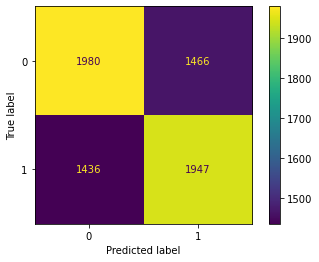

In [66]:
plot_confusion_matrix(gs, X_test, y_test)

The confusion matrix shows that this method doesn't predict if a more serious collision will occur, but rather how well does logistic regression predict the outcome of either property damage or injury.

### Decision Tree

In [373]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [374]:
dtc = DecisionTreeClassifier(max_depth=7, random_state = 1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=1)

In [389]:
plt.figure(figsize=(350,150))
plot_tree(dtc, filled=True, feature_names=X_ohe.columns, fontsize=80);

In [376]:
dtc_pred = dtc.predict(X_test)

In [377]:
# score

In [378]:
accuracy_score(y_test, dtc_pred)

0.5768048030458339

In [379]:
dtc.score(X_test, y_test)

0.5768048030458339

In [ ]:
Using a Neural Network

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [89]:
X_ohe.shape

(27314, 20)

In [90]:
len(y_le)

27314

In [105]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_ohe, y_le, 
                                                                test_size = 0.3, 
                                                                random_state=42)

In [106]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train_nn)
X_test_sc = ss.transform(X_test_nn)

In [107]:
model = Sequential()
#add a dense layer = fully connected
model.add(Dense(32, input_shape=(20,), activation='relu')) # hidden layer --> 32 nodes, 20 features x 1, use activation function relu
model.add(Dense(1, activation='sigmoid'))  # output layer

In [108]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [110]:
history = model.fit(X_train_sc, y_train_nn, validation_data=(X_test_sc, y_test_nn), epochs=64, batch_size=32)

Epoch 1/64
598/598 [==============================] - 3s 4ms/step - loss: 0.7087 - accuracy: 0.5345 - val_loss: 0.6785 - val_accuracy: 0.5739
Epoch 2/64
598/598 [==============================] - 2s 3ms/step - loss: 0.6769 - accuracy: 0.5727 - val_loss: 0.6744 - val_accuracy: 0.5821
Epoch 3/64
598/598 [==============================] - 2s 3ms/step - loss: 0.6746 - accuracy: 0.5780 - val_loss: 0.6740 - val_accuracy: 0.5807
Epoch 4/64
598/598 [==============================] - 2s 3ms/step - loss: 0.6725 - accuracy: 0.5790 - val_loss: 0.6738 - val_accuracy: 0.5804
Epoch 5/64
598/598 [==============================] - 2s 3ms/step - loss: 0.6741 - accuracy: 0.5763 - val_loss: 0.6724 - val_accuracy: 0.5855
Epoch 6/64
598/598 [==============================] - 2s 4ms/step - loss: 0.6716 - accuracy: 0.5825 - val_loss: 0.6727 - val_accuracy: 0.5850
Epoch 7/64
598/598 [==============================] - 2s 4ms/step - loss: 0.6698 - accuracy: 0.5834 - val_loss: 0.6730 - val_accuracy: 0.5844
Epoch 

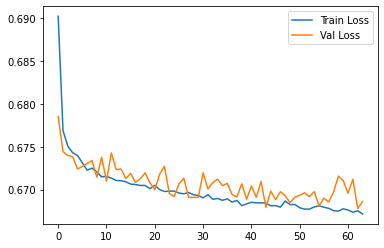

In [111]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend();

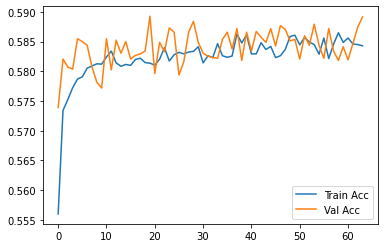

In [113]:
plt.plot(history.history['accuracy'], label = 'Train Acc')
plt.plot(history.history['val_accuracy'], label = 'Val Acc')
plt.legend();

# NN with more layers

In [120]:
model = Sequential()
#add a dense layer = fully connected
model.add(Dense(64, input_shape=(20,), activation='relu')) # hidden layer --> 32 nodes, 20 features x 1, use activation function relu
model.add(Dense(32, input_shape=(20,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # output layer

In [121]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [123]:
history = model.fit(X_train_sc, y_train_nn, validation_data=(X_test_sc, y_test_nn), epochs=64, batch_size=32)

Epoch 1/64
598/598 [==============================] - 3s 4ms/step - loss: 0.6910 - accuracy: 0.5552 - val_loss: 0.6731 - val_accuracy: 0.5855
Epoch 2/64
598/598 [==============================] - 2s 3ms/step - loss: 0.6773 - accuracy: 0.5753 - val_loss: 0.6728 - val_accuracy: 0.5839
Epoch 3/64
598/598 [==============================] - 2s 3ms/step - loss: 0.6745 - accuracy: 0.5772 - val_loss: 0.6743 - val_accuracy: 0.5840
Epoch 4/64
598/598 [==============================] - 2s 4ms/step - loss: 0.6732 - accuracy: 0.5818 - val_loss: 0.6717 - val_accuracy: 0.5810
Epoch 5/64
598/598 [==============================] - 4s 7ms/step - loss: 0.6715 - accuracy: 0.5875 - val_loss: 0.6714 - val_accuracy: 0.5863
Epoch 6/64
598/598 [==============================] - 3s 6ms/step - loss: 0.6694 - accuracy: 0.5847 - val_loss: 0.6717 - val_accuracy: 0.5876
Epoch 7/64
598/598 [==============================] - 4s 6ms/step - loss: 0.6702 - accuracy: 0.5827 - val_loss: 0.6711 - val_accuracy: 0.5884
Epoch 

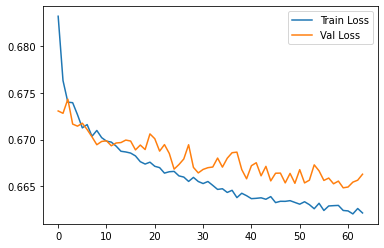

In [124]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend();

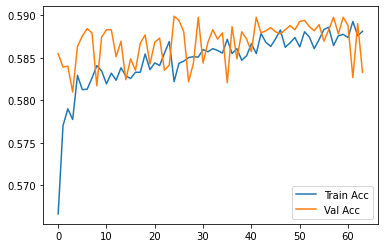

In [125]:
plt.plot(history.history['accuracy'], label = 'Train Acc')
plt.plot(history.history['val_accuracy'], label = 'Val Acc')
plt.legend();

# NN with even more layers

In [126]:
model = Sequential()
#add a dense layer = fully connected
model.add(Dense(64, input_shape=(20,), activation='relu')) # hidden layer --> 32 nodes, 20 features x 1, use activation function relu
model.add(Dense(32, input_shape=(20,), activation='relu'))
model.add(Dense(32, input_shape=(20,), activation='relu'))
model.add(Dense(32, input_shape=(20,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # output layer

In [127]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [128]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [129]:
history = model.fit(X_train_sc, y_train_nn, validation_data=(X_test_sc, y_test_nn), epochs=64, batch_size=32)

Epoch 1/64
598/598 [==============================] - 3s 4ms/step - loss: 0.6861 - accuracy: 0.5516 - val_loss: 0.6750 - val_accuracy: 0.5762
Epoch 2/64
598/598 [==============================] - 2s 4ms/step - loss: 0.6779 - accuracy: 0.5713 - val_loss: 0.6728 - val_accuracy: 0.5807
Epoch 3/64
598/598 [==============================] - 2s 3ms/step - loss: 0.6750 - accuracy: 0.5744 - val_loss: 0.6735 - val_accuracy: 0.5832
Epoch 4/64
598/598 [==============================] - 4s 6ms/step - loss: 0.6715 - accuracy: 0.5830 - val_loss: 0.6718 - val_accuracy: 0.5858
Epoch 5/64
598/598 [==============================] - 3s 5ms/step - loss: 0.6731 - accuracy: 0.5753 - val_loss: 0.6751 - val_accuracy: 0.5791
Epoch 6/64
598/598 [==============================] - 2s 3ms/step - loss: 0.6734 - accuracy: 0.5781 - val_loss: 0.6715 - val_accuracy: 0.5845
Epoch 7/64
598/598 [==============================] - 2s 4ms/step - loss: 0.6716 - accuracy: 0.5818 - val_loss: 0.6714 - val_accuracy: 0.5804
Epoch 

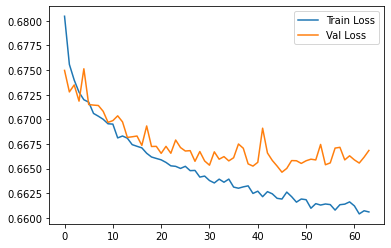

In [130]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend();

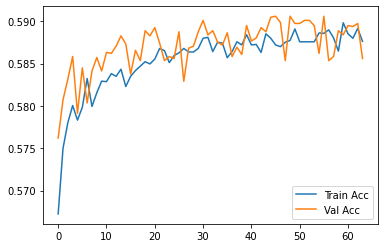

In [131]:
plt.plot(history.history['accuracy'], label = 'Train Acc')
plt.plot(history.history['val_accuracy'], label = 'Val Acc')
plt.legend();

## Try Ensemble

In [380]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

In [381]:
from sklearn.neighbors import KNeighborsClassifier

In [382]:
# we should scale our data
vc = VotingClassifier([
    ('lr', LogisticRegression(max_iter=1000)), 
    ('dt', DecisionTreeClassifier()), 
    ('knn', KNeighborsClassifier())
], voting='soft')

In [383]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [384]:
vc.score(X_test, y_test)

0.5825157416898521

In [385]:
# ensemble score went lower than other models after longitude and latitude were added.

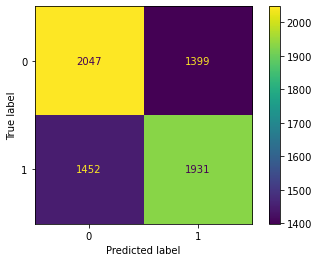

In [386]:
plot_confusion_matrix(vc, X_test, y_test)

## Try Boosting

In [94]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
import sklearn

In [95]:
pipe = make_pipeline(OneHotEncoder(), HistGradientBoostingClassifier()) # use classifier

In [96]:
params = {'histgradientboostingclassifier__l2_regularization': [0.01,.1, 1, 10, 100]}

In [97]:
gs = GridSearchCV(pipe, params, scoring='recall', n_jobs=-1)

In [98]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [99]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                                       ('histgradientboostingclassifier',
                                        HistGradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'histgradientboostingclassifier__l2_regularization': [0.01,
                                                                               0.1,
                                                                               1,
                                                                               10,
                                                                               100]},
             scoring='recall')

In [100]:
gs.score(X_test, y_test)

0.546260715341413

In [101]:
gs.best_params_

{'histgradientboostingclassifier__l2_regularization': 0.01}